## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
import pandas as pd
import keras


In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [183]:
x_train.shape[0]

60000

In [184]:
x_test.shape[0]

10000

### Find dimensions of an image in the dataset

In [185]:
x_train.shape[1]

28

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

In [187]:
y_train_class

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train =  x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [189]:
x_train.shape

(60000, 28, 28)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))



In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_14 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [195]:
output_simple_conv = model.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.5523 - acc: 0.8087 - val_loss: 0.3888 - val_acc: 0.8646
Epoch 2/10
 - 4s - loss: 0.3281 - acc: 0.8845 - val_loss: 0.3281 - val_acc: 0.8806
Epoch 3/10
 - 4s - loss: 0.2743 - acc: 0.9024 - val_loss: 0.3071 - val_acc: 0.8905
Epoch 4/10
 - 4s - loss: 0.2429 - acc: 0.9127 - val_loss: 0.2972 - val_acc: 0.8953
Epoch 5/10
 - 4s - loss: 0.2200 - acc: 0.9211 - val_loss: 0.2769 - val_acc: 0.9014
Epoch 6/10
 - 4s - loss: 0.1962 - acc: 0.9288 - val_loss: 0.2578 - val_acc: 0.9090
Epoch 7/10
 - 4s - loss: 0.1730 - acc: 0.9380 - val_loss: 0.3063 - val_acc: 0.8962
Epoch 8/10
 - 4s - loss: 0.1600 - acc: 0.9417 - val_loss: 0.2583 - val_acc: 0.9099
Epoch 9/10
 - 4s - loss: 0.1388 - acc: 0.9492 - val_loss: 0.2591 - val_acc: 0.9112
Epoch 10/10
 - 4s - loss: 0.1220 - acc: 0.9570 - val_loss: 0.2829 - val_acc: 0.9080


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [197]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
output_simple_conv = model.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.6097 - acc: 0.7902 - val_loss: 0.4027 - val_acc: 0.8564
Epoch 2/10
 - 4s - loss: 0.3574 - acc: 0.8747 - val_loss: 0.3471 - val_acc: 0.8793
Epoch 3/10
 - 4s - loss: 0.3099 - acc: 0.8907 - val_loss: 0.3080 - val_acc: 0.8898
Epoch 4/10
 - 4s - loss: 0.2830 - acc: 0.8989 - val_loss: 0.2858 - val_acc: 0.8982
Epoch 5/10
 - 4s - loss: 0.2581 - acc: 0.9065 - val_loss: 0.2718 - val_acc: 0.9021
Epoch 6/10
 - 4s - loss: 0.2397 - acc: 0.9130 - val_loss: 0.2617 - val_acc: 0.9042
Epoch 7/10
 - 4s - loss: 0.2235 - acc: 0.9189 - val_loss: 0.2513 - val_acc: 0.9086
Epoch 8/10
 - 4s - loss: 0.2120 - acc: 0.9233 - val_loss: 0.2401 - val_acc: 0.9142
Epoch 9/10
 - 4s - loss: 0.1986 - acc: 0.9269 - val_loss: 0.2482 - val_acc: 0.9102
Epoch 10/10
 - 4s - loss: 0.1874 - acc: 0.9316 - val_loss: 0.2271 - val_acc: 0.9184


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

In [0]:
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

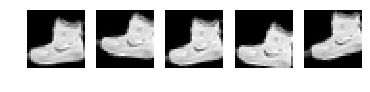

In [201]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [202]:
output = model.fit_generator(datagen.flow(x_train_conv, y_train_class, batch_size=32), 
                             validation_data=(x_test_conv, y_test_class), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.5313 - acc: 0.8000 - val_loss: 0.3969 - val_acc: 0.8517
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.4245 - acc: 0.8405 - val_loss: 0.3396 - val_acc: 0.8749
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3911 - acc: 0.8538 - val_loss: 0.3279 - val_acc: 0.8819
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3684 - acc: 0.8629 - val_loss: 0.3264 - val_acc: 0.8806
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3532 - acc: 0.8679 - val_loss: 0.2995 - val_acc: 0.8927


###  Report the final train and validation accuracy

In [203]:
output.history['acc'][-1:]

[0.86785]

In [204]:
output.history['val_acc'][-1:]

[0.8927]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train =  x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [208]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test_conv = x_test.reshape(x_test.shape[0], 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


In [0]:
cifar10datagen = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True)

### **Prepare/fit the generator.**

In [214]:
output = model.fit_generator(cifar10datagen.flow(x_train_conv, y_train_class, batch_size=32), 
                             validation_data=(x_test_conv, y_test_class), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=5)

Epoch 1/5
1563/1562 [==============================] - 42s 27ms/step - loss: 1.6730 - acc: 0.3853 - val_loss: 1.4655 - val_acc: 0.4643
Epoch 2/5
1563/1562 [==============================] - 41s 26ms/step - loss: 1.4441 - acc: 0.4753 - val_loss: 1.3504 - val_acc: 0.5191
Epoch 3/5
1563/1562 [==============================] - 41s 26ms/step - loss: 1.3559 - acc: 0.5096 - val_loss: 1.2965 - val_acc: 0.5379
Epoch 4/5
1563/1562 [==============================] - 41s 26ms/step - loss: 1.3048 - acc: 0.5287 - val_loss: 1.2824 - val_acc: 0.5551
Epoch 5/5
1563/1562 [==============================] - 41s 26ms/step - loss: 1.2662 - acc: 0.5465 - val_loss: 1.1919 - val_acc: 0.5776


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

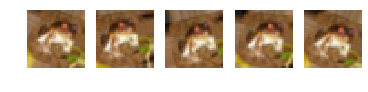

In [215]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()